In [3]:
import pandas as pd

In [4]:
mw_df = pd.read_table("data/mw/refmet_in_allmsstudies_hasinchikey.tsv")

In [5]:
mw_df

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,C18H22ClNO6,383.113567,SBALNGLYQFMKPR-NQTWQHAWSA-N,COC1=CC(=O)[C@@]2([C@@H]1O)[C@@H](Cl)C[C@]13NC...,442840.0
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,C22H20N2O7,424.127053,DJWXVEDJWPDUBQ-DEALGVFLSA-N,COC(=O)C1=CO[C@H](O)[C@H]2[C@@H]1Cc1nc(C(=O)O)...,441972.0
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,C21H21NO6,383.136889,SZDGAZFTAUFFQH-OALUTQOASA-N,COc1cc2c(cc1OC)[C@@H]([C@H]1OC(=O)c3c1ccc1c3OC...,442155.0
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,C20H24N2O2,324.183778,PXFBZOLANLWPMH-SMLHJDAJSA-N,C/C=C1/CN(C)[C@@H]2Cc3c([nH]c4ccccc34)C(=O)C[C...,5281345.0
4,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,C16H18N2,238.146999,XJOOMMHNYOJWCZ-UKRRQHHQSA-N,CC1=C[C@@H]2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1,73484.0
...,...,...,...,...,...,...,...,...,...
8835,Stigmasterol,Sterol Lipids,Sterols,Stigmasterols,C29H48O,412.370515,HCXVJBMSMIARIN-PHZDYDNGSA-N,CC(C)[C@@H](CC)/C=C/[C@H](C)[C@@H]1CC[C@@H]2[C...,5280794.0
8836,Taccalonolide A,Sterol Lipids,Sterols,Withanolides,C36H46O14,702.288760,PTTJLTMUKRRHAT-VJAKQJMOSA-N,CC(=O)O[C@@H]1[C@H]2[C@H]3[C@H]([C@H](OC(C)=O)...,441685.0
8837,Hydroxylamine,Unclassified,Unclassified,Unclassified,H3NO,33.021464,AVXURJPOCDRRFD-UHFFFAOYSA-N,NO,787.0
8838,Phosphoric acid,Unclassified,Unclassified,Unclassified,PH3O4,97.976898,NBIIXXVUZAFLBC-UHFFFAOYSA-N,O=P(O)(O)O,1004.0


In [22]:
# select inchi_key column from mw_df
mw_inchi_key = mw_df["inchi_key"]

In [23]:
# unique mw_inchi_key
unique_mw_inchi_key = mw_inchi_key.unique()

In [24]:
# length of unique_mw_inchi_key
unique_mw_inchi_key.size

8833

In [25]:
len(unique_mw_inchi_key)

8833

In [11]:
# create a function to check a string meets InChIKey format
def is_inchikey(string):
    """
    Check if a string is in InChIKey format.
    """
    if len(string) == 27:
        if string[14] == "-":
            if string[25] == "-":
                return True
    return False

In [26]:
# apply unique_inchi_key to is_inchikey function
check_unique_inchi_key = [x for x in unique_mw_inchi_key if is_inchikey(x)]

In [27]:
# check that check_unique_inchi_key does not have False
False in check_unique_inchi_key

False

In [28]:
unique_mw_inchi_key

array(['SBALNGLYQFMKPR-NQTWQHAWSA-N', 'DJWXVEDJWPDUBQ-DEALGVFLSA-N',
       'SZDGAZFTAUFFQH-OALUTQOASA-N', ..., 'AVXURJPOCDRRFD-UHFFFAOYSA-N',
       'NBIIXXVUZAFLBC-UHFFFAOYSA-N', 'GYQBBRRVRKFJRG-UHFFFAOYSA-L'],
      dtype=object)

In [29]:
# check that the unique_inchi_key does not have duplicates
len(unique_mw_inchi_key) == len(set(unique_mw_inchi_key))

True

In [48]:
# create a function to get the first 14 characters of an InChIKey
def get_inchikey_prefix(inchikey):
    """
    Get the first 14 characters of an InChIKey.
    """
    return inchikey[:14]

In [186]:
# apply get_inchikey_prefix to unique_mw_inchi_key
mw_inchi_key_prefix = [get_inchikey_prefix(x) for x in unique_mw_inchi_key]

In [187]:
unique_mw_inchi_key_prefix = pd.Series(mw_inchi_key_prefix).unique()


In [188]:
len(unique_mw_inchi_key_prefix)

8466

In [189]:
len(set(unique_mw_inchi_key_prefix))

8466

# KEGG

## InChIKey for KEGG

In [19]:
kegg_df = pd.read_table("data/kegg/pathway_inchikey_dict.tsv")

In [20]:
kegg_df

,pathway,compound,inchikey
0,map01100,C00001,XLYOFNOQVPJJNP-UHFFFAOYSA-N
1,map01100,C00002,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
2,map01100,C00003,BAWFJGJZGIEFAR-NNYOXOHSSA-O
3,map01100,C00004,BOPGDPNILDQYTO-NNYOXOHSSA-N
4,map01100,C00005,ACFIXJIJDZMPPO-NNYOXOHSSA-N
...,...,...,...
18852,map07117,C15026,KDFQABSFVYLGPM-QFIPXVFZSA-N
18853,map07117,C15040,LFBZZHVSGAHQPP-UHFFFAOYSA-N
18854,map07117,C15094,AQTITSBNGSVQNZ-UHFFFAOYNA-N
18855,map07117,C15096,RZERRLOTRSJIAW-NEPGVILWSA-N


In [21]:
# select inchikey column from kegg_df
kegg_inchikey = kegg_df["inchikey"]


In [37]:
# unique kegg_inchikey
unique_kegg_inchikey = kegg_inchikey.unique()
# remove null element from unique_kegg_inchikey
unique_kegg_inchikey = unique_kegg_inchikey[~pd.isnull(unique_kegg_inchikey)]

In [38]:
# count number of null element in unique_kegg_inchikey
sum(pd.isnull(unique_kegg_inchikey))

0

In [39]:
# apply unique_kegg_inchikey to is_inchikey function
check_unique_kegg_inchikey = [x for x in unique_kegg_inchikey if is_inchikey(x)]

In [40]:
# check that check_unique_kegg_inchikey does not have False
False in check_unique_kegg_inchikey

False

In [43]:
# check that the unique_kegg_inchikey does not have duplicates
len(unique_kegg_inchikey) == len(set(unique_kegg_inchikey))

True

In [44]:
len(unique_kegg_inchikey)

5875

In [191]:
# apply get_inchikey_prefix to unique_kegg_inchikey
kegg_inchikey_prefix = [get_inchikey_prefix(x) for x in unique_kegg_inchikey]

In [192]:
unique_kegg_inchikey_prefix = pd.Series(kegg_inchikey_prefix).unique()

In [193]:
len(unique_kegg_inchikey_prefix)

5421

In [194]:
len(set(unique_kegg_inchikey_prefix))

5421

## pathway for KEGG

In [68]:
# select rows that the inchikey column value is not null from kegg_df
kegg_df_has_inchikey = kegg_df[~pd.isnull(kegg_df["inchikey"])]

In [69]:
kegg_df_has_inchikey

,pathway,compound,inchikey
0,map01100,C00001,XLYOFNOQVPJJNP-UHFFFAOYSA-N
1,map01100,C00002,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
2,map01100,C00003,BAWFJGJZGIEFAR-NNYOXOHSSA-O
3,map01100,C00004,BOPGDPNILDQYTO-NNYOXOHSSA-N
4,map01100,C00005,ACFIXJIJDZMPPO-NNYOXOHSSA-N
...,...,...,...
18852,map07117,C15026,KDFQABSFVYLGPM-QFIPXVFZSA-N
18853,map07117,C15040,LFBZZHVSGAHQPP-UHFFFAOYSA-N
18854,map07117,C15094,AQTITSBNGSVQNZ-UHFFFAOYNA-N
18855,map07117,C15096,RZERRLOTRSJIAW-NEPGVILWSA-N


In [70]:
# select pathway column from kegg_pathways_with_inchikey
kegg_pathways = kegg_df_has_inchikey["pathway"]

In [71]:
# get unique kegg_pathway
unique_kegg_pathway = kegg_pathways.unique()

In [72]:
# get length of unique_kegg_pathway
len(unique_kegg_pathway)

426

In [73]:
len(set(unique_kegg_pathway))

426

# PathBank all

In [75]:
import gzip
import pickle

with gzip.open('data/pathbank/pathbank_all_metabolites.pkl.gz', 'rb') as file:
    pathbank_df = pickle.load(file)


In [113]:
pathbank_primary = pd.read_csv("data/pathbank/pathbank_primary_metabolites.csv")

In [76]:
pathbank_df

,PathBank ID,Pathway Name,Pathway Subject,Species,Metabolite ID,Metabolite Name,HMDB ID,KEGG ID,ChEBI ID,DrugBank ID,CAS,Formula,IUPAC,SMILES,InChI,InChI Key
0,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000414,Adenosine triphosphate,HMDB0000538,C00002,15422.0,DB00171,56-65-5,C10H16N5O13P3,"({[({[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-...",NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(O)(=O)OP(O...,InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
1,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000105,L-Alanine,HMDB0000161,C00041,16977.0,DB00160,56-41-7,C3H7NO2,(2S)-2-aminopropanoic acid,C[C@H](N)C(O)=O,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",QNAYBMKLOCPYGJ-REOHCLBHSA-N
2,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000032,Adenosine monophosphate,HMDB0000045,C00020,16027.0,DB00131,61-19-8,C10H14N5O7P,"{[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-3,4-...",NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-KQYNXXCUSA-N
3,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000170,Pyrophosphate,HMDB0000250,C00013,18361.0,DB04160,14000-31-8,O7P2,(phosphonooxy)phosphonic acid,[O-]P([O-])(=O)OP([O-])([O-])=O,"InChI=1S/H4O7P2/c1-8(2,3)7-9(4,5)6/h(H2,1,2,3)...",XPPKVPWEQAFLFU-UHFFFAOYSA-J
4,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C001005,Zinc (II) ion,HMDB0001303,C00038,29105.0,DB01593,23713-49-7,Zn,zinc(2+) ion,[Zn++],InChI=1S/Zn/q+2,PTFCDOFLOPIGGS-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977776,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000122,L-Lactic acid,HMDB0000190,C00186,422.0,NaN,79-33-4,C3H6O3,(2S)-2-hydroxypropanoic acid,C[C@@H](O)C(O)=O,"InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)...",JVTAAEKCZFNVCJ-UWTATZPHSA-N
1977777,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C009795,Zinc,HMDB0015532,NaN,27363.0,DB01593,7440-66-6,Zn,zinc(2+) ion,[Zn],InChI=1S/Zn,HCHKCACWOHOZIP-UHFFFAOYSA-N
1977778,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C017005,Ubiquinone-6,HMDB0036062,C17568,52971.0,NaN,1065-31-2,C39H58O4,"2-(3,7,11,15,19,23-hexamethyltetracosa-2,6,10,...",COC1=C(OC)C(=O)C(CC=C(C)CCC=C(C)CCC=C(C)CCC=C(...,InChI=1S/C39H58O4/c1-28(2)16-11-17-29(3)18-12-...,GXNFPEOUKFOTKY-UHFFFAOYSA-N
1977779,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000164,Pyruvic acid,HMDB0000243,C00022,32816.0,DB00119,127-17-3,C3H4O3,2-oxopropanoic acid,CC(=O)C(O)=O,"InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)",LCTONWCANYUPML-UHFFFAOYSA-N


In [114]:
pathbank_primary

,PathBank ID,Pathway Name,Pathway Subject,Species,Metabolite ID,Metabolite Name,HMDB ID,KEGG ID,ChEBI ID,DrugBank ID,CAS,Formula,IUPAC,SMILES,InChI,InChI Key
0,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000414,Adenosine triphosphate,HMDB0000538,C00002,15422.0,DB00171,56-65-5,C10H16N5O13P3,"({[({[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-...",NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(O)(=O)OP(O...,InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
1,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000105,L-Alanine,HMDB0000161,C00041,16977.0,DB00160,56-41-7,C3H7NO2,(2S)-2-aminopropanoic acid,C[C@H](N)C(O)=O,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",QNAYBMKLOCPYGJ-REOHCLBHSA-N
2,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000032,Adenosine monophosphate,HMDB0000045,C00020,16027.0,DB00131,61-19-8,C10H14N5O7P,"{[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-3,4-...",NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-KQYNXXCUSA-N
3,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000170,Pyrophosphate,HMDB0000250,C00013,18361.0,DB04160,14000-31-8,O7P2,(phosphonooxy)phosphonic acid,[O-]P([O-])(=O)OP([O-])([O-])=O,"InChI=1S/H4O7P2/c1-8(2,3)7-9(4,5)6/h(H2,1,2,3)...",XPPKVPWEQAFLFU-UHFFFAOYSA-J
4,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C001005,Zinc (II) ion,HMDB0001303,C00038,29105.0,DB01593,23713-49-7,Zn,zinc(2+) ion,[Zn++],InChI=1S/Zn/q+2,PTFCDOFLOPIGGS-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61866,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000122,L-Lactic acid,HMDB0000190,C00186,422.0,NaN,79-33-4,C3H6O3,(2S)-2-hydroxypropanoic acid,C[C@@H](O)C(O)=O,"InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)...",JVTAAEKCZFNVCJ-UWTATZPHSA-N
61867,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C009795,Zinc,HMDB0015532,NaN,27363.0,DB01593,7440-66-6,Zn,zinc(2+) ion,[Zn],InChI=1S/Zn,HCHKCACWOHOZIP-UHFFFAOYSA-N
61868,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C017005,Ubiquinone-6,HMDB0036062,C17568,52971.0,NaN,1065-31-2,C39H58O4,"2-(3,7,11,15,19,23-hexamethyltetracosa-2,6,10,...",COC1=C(OC)C(=O)C(CC=C(C)CCC=C(C)CCC=C(C)CCC=C(...,InChI=1S/C39H58O4/c1-28(2)16-11-17-29(3)18-12-...,GXNFPEOUKFOTKY-UHFFFAOYSA-N
61869,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000164,Pyruvic acid,HMDB0000243,C00022,32816.0,DB00119,127-17-3,C3H4O3,2-oxopropanoic acid,CC(=O)C(O)=O,"InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)",LCTONWCANYUPML-UHFFFAOYSA-N


In [77]:
pathbank_df.shape

(1977781, 16)

In [115]:
pathbank_primary.shape

(61871, 16)

In [80]:
# select rows that the "InChI Key" column value is not null from pathbank_df
pathbank_df_has_inchikey = pathbank_df[~pd.isnull(pathbank_df["InChI Key"])]


In [116]:
pathbank_primary_has_inchikey = pathbank_primary[~pd.isnull(pathbank_primary["InChI Key"])]

In [83]:
# select "InChI Key" column from pathbank_df_has_inchikey
pathbank_inchikey = pathbank_df_has_inchikey["InChI Key"]

In [117]:
pathbank_primary_inchikey = pathbank_primary_has_inchikey["InChI Key"]

In [84]:
# get unique pathbank_inchikey
unique_pathbank_inchikey = pathbank_inchikey.unique()

In [118]:
unique_pathbank_primary_inchikey = pathbank_primary_inchikey.unique()

In [85]:
# get length of unique_pathbank_inchikey
len(unique_pathbank_inchikey)

78192

In [119]:
len(unique_pathbank_primary_inchikey)

2796

In [120]:
unique_pathbank_primary_inchikey

array(['ZKHQWZAMYRWXGA-KQYNXXCUSA-N', 'QNAYBMKLOCPYGJ-REOHCLBHSA-N',
       'UDMBCSSLTHHNCD-KQYNXXCUSA-N', ..., 'KZJWDPNRJALLNS-VJSFXXLFSA-N',
       'OILXMJHPFNGGTO-SDMVIZLASA-N', 'HCXVJBMSMIARIN-PHZDYDNGSA-N'],
      dtype=object)

In [86]:
# check that unique_pathbank_inchikey does not have duplicates
len(unique_pathbank_inchikey) == len(set(unique_pathbank_inchikey))

True

In [121]:
len(unique_pathbank_primary_inchikey) == len(set(unique_pathbank_primary_inchikey))

True

In [87]:
# check that unique_pathbank_inchikey does not have null element
sum(pd.isnull(unique_pathbank_inchikey))

0

In [88]:
# apply is_inchikey function to unique_pathbank_inchikey
check_unique_pathbank_inchikey = [x for x in unique_pathbank_inchikey if is_inchikey(x)]

In [89]:
# check check_unique_pathbank_inchikey does not have False
False in check_unique_pathbank_inchikey

False

In [202]:
# get the first 14 characters of unique_pathbank_inchikey
pathbank_inchikey_prefix = [get_inchikey_prefix(x) for x in unique_pathbank_inchikey]

In [204]:
unique_pathbank_inchikey_prefix = pd.Series(pathbank_inchikey_prefix).unique()

In [205]:
pathbank_primary_inchikey_prefix = [get_inchikey_prefix(x) for x in unique_pathbank_primary_inchikey]

In [206]:
unique_pathbank_primary_inchikey_prefix = pd.Series(pathbank_primary_inchikey_prefix).unique()

In [207]:
len(set(unique_pathbank_inchikey_prefix))

72348

In [208]:
len(set(unique_pathbank_primary_inchikey_prefix))

2560

## pathways in PathBank

In [92]:
pathbank_df

,PathBank ID,Pathway Name,Pathway Subject,Species,Metabolite ID,Metabolite Name,HMDB ID,KEGG ID,ChEBI ID,DrugBank ID,CAS,Formula,IUPAC,SMILES,InChI,InChI Key
0,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000414,Adenosine triphosphate,HMDB0000538,C00002,15422.0,DB00171,56-65-5,C10H16N5O13P3,"({[({[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-...",NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(O)(=O)OP(O...,InChI=1S/C10H16N5O13P3/c11-8-5-9(13-2-12-8)15(...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
1,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000105,L-Alanine,HMDB0000161,C00041,16977.0,DB00160,56-41-7,C3H7NO2,(2S)-2-aminopropanoic acid,C[C@H](N)C(O)=O,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",QNAYBMKLOCPYGJ-REOHCLBHSA-N
2,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000032,Adenosine monophosphate,HMDB0000045,C00020,16027.0,DB00131,61-19-8,C10H14N5O7P,"{[(2R,3S,4R,5R)-5-(6-amino-9H-purin-9-yl)-3,4-...",NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-KQYNXXCUSA-N
3,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C000170,Pyrophosphate,HMDB0000250,C00013,18361.0,DB04160,14000-31-8,O7P2,(phosphonooxy)phosphonic acid,[O-]P([O-])(=O)OP([O-])([O-])=O,"InChI=1S/H4O7P2/c1-8(2,3)7-9(4,5)6/h(H2,1,2,3)...",XPPKVPWEQAFLFU-UHFFFAOYSA-J
4,SMP0000055,Alanine Metabolism,Metabolic,Homo sapiens,PW_C001005,Zinc (II) ion,HMDB0001303,C00038,29105.0,DB01593,23713-49-7,Zn,zinc(2+) ion,[Zn++],InChI=1S/Zn/q+2,PTFCDOFLOPIGGS-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977776,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000122,L-Lactic acid,HMDB0000190,C00186,422.0,NaN,79-33-4,C3H6O3,(2S)-2-hydroxypropanoic acid,C[C@@H](O)C(O)=O,"InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)...",JVTAAEKCZFNVCJ-UWTATZPHSA-N
1977777,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C009795,Zinc,HMDB0015532,NaN,27363.0,DB01593,7440-66-6,Zn,zinc(2+) ion,[Zn],InChI=1S/Zn,HCHKCACWOHOZIP-UHFFFAOYSA-N
1977778,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C017005,Ubiquinone-6,HMDB0036062,C17568,52971.0,NaN,1065-31-2,C39H58O4,"2-(3,7,11,15,19,23-hexamethyltetracosa-2,6,10,...",COC1=C(OC)C(=O)C(CC=C(C)CCC=C(C)CCC=C(C)CCC=C(...,InChI=1S/C39H58O4/c1-28(2)16-11-17-29(3)18-12-...,GXNFPEOUKFOTKY-UHFFFAOYSA-N
1977779,SMP0122266,Methylglyoxal Degradation I,Metabolic,Pseudomonas aeruginosa,PW_C000164,Pyruvic acid,HMDB0000243,C00022,32816.0,DB00119,127-17-3,C3H4O3,2-oxopropanoic acid,CC(=O)C(O)=O,"InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)",LCTONWCANYUPML-UHFFFAOYSA-N


In [94]:
pathbank_df.columns

Index(['PathBank ID', 'Pathway Name', 'Pathway Subject', 'Species',
       'Metabolite ID', 'Metabolite Name', 'HMDB ID', 'KEGG ID', 'ChEBI ID',
       'DrugBank ID', 'CAS', 'Formula', 'IUPAC', 'SMILES', 'InChI',
       'InChI Key'],
      dtype='object')

In [ ]:
pathbank_df_has_inchikey.shape

(1977762, 16)

In [124]:
pathbank_primary_has_inchikey.shape

(61852, 16)

In [ ]:
# get unique elements from 'PathBank ID' column
unique_pathbank_id = pathbank_df_has_inchikey["PathBank ID"].unique()

In [ ]:
# get length of unique_pathbank_id
len(unique_pathbank_id)

110158

In [ ]:
# check that unique_pathbank_id does not have duplicates
len(unique_pathbank_id) == len(set(unique_pathbank_id))

True

In [109]:
# select "Pathway Name" column from pathbank_df
pathbank_pathway = pathbank_df_has_inchikey["Pathway Name"]

In [125]:
pathbank_pathway_primary = pathbank_primary_has_inchikey["Pathway Name"]

In [110]:
# get unique pathbank_pathway
unique_pathbank_pathway = pathbank_pathway.unique()

In [126]:
unique_pathbank_pathway_primary = pathbank_pathway_primary.unique()

In [111]:
# get length of unique_pathbank_pathway
len(unique_pathbank_pathway)

68358

In [127]:
len(unique_pathbank_pathway_primary)

1277

In [112]:
# check that unique_pathbank_pathway does not have duplicates
len(unique_pathbank_pathway) == len(set(unique_pathbank_pathway))

True

In [101]:
# sort unique_pathbank_pathway by alphabet
sorted_unique_pathbank_pathway = sorted(unique_pathbank_pathway)

In [102]:
sorted_unique_pathbank_pathway


['1,6-Anhydro-N-acetylmuramic Acid Recycling',
 '11-beta-Hydroxylase Deficiency (CYP11B1)',
 '11-cis-3-Hydroxyretinal Biosynthesis',
 '17-alpha-Hydroxylase Deficiency (CYP17)',
 '17-beta Hydroxysteroid Dehydrogenase III Deficiency',
 '2,3-Dihydroxybenzoate Biosynthesis',
 '2-Amino-3-Carboxymuconate Semialdehyde Degradation',
 '2-Aminoadipic 2-Oxoadipic Aciduria',
 '2-Hydroxyglutric Aciduria (D and L Form)',
 '2-Ketoglutarate Dehydrogenase Complex Deficiency',
 '2-Methyl-3-hydroxybutryl-CoA Dehydrogenase Deficiency',
 '2-Methyl-3-hydroxybutyryl-CoA Dehydrogenase Deficiency',
 '2-O-alpha-Mannosyl-D-glycerate Degradation',
 '2-Oxoglutarate Decarboxylation to Succinyl-CoA',
 '2-Oxopent-4-enoate Metabolism ',
 '2-Oxopent-4-enoate Metabolism 2',
 '21-Hydroxylase Deficiency (CYP21)',
 '27-Hydroxylase Deficiency',
 '3-Hydroxy-3-methylglutaryl-CoA Lyase Deficiency',
 '3-Hydroxyisobutyric Acid Dehydrogenase Deficiency',
 '3-Hydroxyisobutyric Aciduria',
 '3-Methylcrotonyl-CoA Carboxylase Deficien

# WikiPathways

## InChIKey for WikiPathways

In [129]:
wikipathways_df = pd.read_csv("data/wikipathways/wikipathways2inchikey.csv")


In [130]:
wikipathways_df

,pathwayRes,pathway,pathwayTitle,pubchemcid,inchikey
0,https://identifiers.org/wikipathways/WP5060_r1...,WP5060,Peptidoglycan cytoplasmic synthesis and recycl...,5280338,UFPHFKCTOZIAFY-RDQGWRCRSA-N
1,https://identifiers.org/wikipathways/WP5060_r1...,WP5060,Peptidoglycan cytoplasmic synthesis and recycl...,5460362,DEFJQIDDEAULHB-QWWZWVQMSA-N
2,https://identifiers.org/wikipathways/WP5060_r1...,WP5060,Peptidoglycan cytoplasmic synthesis and recycl...,24771768,OJZCATPXPWFLHF-DNMPHPEFSA-N
3,https://identifiers.org/wikipathways/WP5060_r1...,WP5060,Peptidoglycan cytoplasmic synthesis and recycl...,5280604,NTXGVHCCXVHYCL-RDQGWRCRSA-N
4,https://identifiers.org/wikipathways/WP5060_r1...,WP5060,Peptidoglycan cytoplasmic synthesis and recycl...,16059194,IMWOXEZVYQDRDF-MCZXNMLPSA-N
...,...,...,...,...,...
18440,https://identifiers.org/wikipathways/WP5392_r1...,WP5392,CBD synthetic pathway,5281909,OINNEUNVOZHBOX-KWBDAJKESA-N
18441,https://identifiers.org/wikipathways/WP5392_r1...,WP5392,CBD synthetic pathway,160570,WVOLTBSCXRRQFR-DLBZAZTESA-N
18442,https://identifiers.org/wikipathways/WP5392_r1...,WP5392,CBD synthetic pathway,98523,UCONUSSAWGCZMV-HZPDHXFCSA-N
18443,https://identifiers.org/wikipathways/WP5392_r1...,WP5392,CBD synthetic pathway,6449999,SEEZIOZEUUMJME-FOWTUZBSSA-N


In [131]:
# select rows that the "inchikey" column value is not null from wikipathways_df
wikipathways_df_has_inchikey = wikipathways_df[~pd.isnull(wikipathways_df["inchikey"])]

In [132]:
wikipathways_df_has_inchikey.shape

(17656, 5)

In [133]:
# get unique elements from "inchikey" column
unique_wikipathways_inchikey = wikipathways_df_has_inchikey["inchikey"].unique()

In [134]:
# get length of unique_wikipathways_inchikey
len(unique_wikipathways_inchikey)

3899

In [211]:
# get first 14 characters of unique_wikipathways_inchikey
wikipathways_inchikey_prefix = [get_inchikey_prefix(x) for x in unique_wikipathways_inchikey]

In [212]:
unique_wikipathways_inchikey_prefix = pd.Series(wikipathways_inchikey_prefix).unique()

In [213]:
len(unique_wikipathways_inchikey_prefix)

3074

In [153]:
# get length of unique_wikipathways_inchikey_prefix
#len(unique_wikipathways_inchikey_prefix)
len(set(unique_wikipathways_inchikey_prefix))

3074

In [137]:
unique_wikipathways_inchikey

array(['UFPHFKCTOZIAFY-RDQGWRCRSA-N', 'DEFJQIDDEAULHB-QWWZWVQMSA-N',
       'OJZCATPXPWFLHF-DNMPHPEFSA-N', ..., 'UCONUSSAWGCZMV-HZPDHXFCSA-N',
       'SEEZIOZEUUMJME-FOWTUZBSSA-N', 'SXFKFRRXJUJGSS-UHFFFAOYSA-N'],
      dtype=object)

In [138]:
unique_wikipathways_inchikey_prefix

['UFPHFKCTOZIAFY',
 'DEFJQIDDEAULHB',
 'OJZCATPXPWFLHF',
 'NTXGVHCCXVHYCL',
 'IMWOXEZVYQDRDF',
 'OXJNZXDFVLDLEI',
 'QUHLBZKCGUXHGP',
 'WHUUTDBJXJRKMK',
 'ZFEGYUMHFZOYIY',
 'NMEMTQKUEVNSPV',
 'BEGZZYPUNCJHKP',
 'NQBRVZNDBBMBLJ',
 'GMKMEZVLHJARHF',
 'QDSLHWJDSQGPEE',
 'PNWZQTONLRRPST',
 'VFGFFQOPKZHQLZ',
 'VFGFFQOPKZHQLZ',
 'MNLRQHMNZILYPY',
 'NTMMCWJNQNKACG',
 'QNAYBMKLOCPYGJ',
 'BZQFBWGGLXLEPQ',
 'KVJVJJWIEXCECB',
 'RXMHNAKZMGJANZ',
 'WTSQHJYZDLRRNB',
 'BQMSKLCEWBSPPY',
 'SATGKQGFUDXGAX',
 'UCVRZTRGVBWBPR',
 'RLXAPPIBYACUSX',
 'RJOIOUAJASFEIW',
 'IPIPDCALAORYQI',
 'APRNTIKLHCDMEI',
 'APRNTIKLHCDMEI',
 'PQRNIWLSPFPEFN',
 'IPIPDCALAORYQI',
 'KFKKPWDBCOCTSD',
 'RJARQVHGCJUKLX',
 'CVXAKOHZAAGHRM',
 'QMZRMXQCHRPRQD',
 'KJTLQQUUPVSXIM',
 'CABVTRNMFUVUDM',
 'OJFDKHTZOUZBOS',
 'SIGQQUBJQXSAMW',
 'CBIDRCWHNCKSTO',
 'GVVPGTZRZFNKDS',
 'OKZYCXHTTZZYSK',
 'HWXBTNAVRSUOJR',
 'JFCQEDHGNNZCLN',
 'OEXFMSFODMQEPE',
 'HSCJRCZFDFQWRP',
 'VZXPDPZARILFQX',
 'LELOWRISYMNNSU',
 'RWSOTUBLDIXVET',
 'KBMBVTRWEA

## pathway for WikiPathways

In [139]:
# select pathway column from wikipathways_df_has_inchikey
wikipathways_pathway = wikipathways_df_has_inchikey["pathway"]

In [141]:
# get unique wikipathways_pathway
unique_wikipathways_pathway = wikipathways_pathway.unique()

In [144]:
# check that unique_wikipathways_pathway does not have duplicates
len(unique_wikipathways_pathway) == len(set(unique_wikipathways_pathway))

True

In [145]:
len(unique_wikipathways_pathway)

1557

# PFOCR

In [46]:
pfocr_df = pd.read_csv("data/pfocr/pfocr_inchikey.csv")

In [47]:
pfocr_df


,figid,word,mesh,match,name,CHEBI_ID,InChIKey
0,PMC100003__mb2410470011,bombesin,mesh:D001839,Bombesin,Bombesin,80229.0,NaN
1,PMC100008__mb2411709009,Bradykinin,mesh:D001920,Bradykinin,bradykinin,3165.0,QXZGBUJJYSLZLT-FDISYFBBSA-N
2,PMC100008__mb2411709009,Isoproterenol,mesh:D007545,Isoproterenol,isoprenaline,64317.0,JWZZKOKVBUJMES-UHFFFAOYSA-N
3,PMC100028__ii1110348001,Ethanolamines,mesh:D004983,Ethanolamines,ethanolamines,23981.0,NaN
4,PMC100028__ii1110348001,Fatty acids,mesh:D005227,Fatty Acids,fatty acid,35366.0,NaN
...,...,...,...,...,...,...,...
309756,PMC9359989__41525_2022_319_Fig6_HTML,12197-3p,mesh:C031128,NaN,NaN,NaN,NaN
309757,PMC8618327__molecules-26-06937-sch029,THF,mesh:C006461,NaN,NaN,NaN,NaN
309758,PMC8618327__molecules-26-06937-sch029,phosphine oxides,mesh:D010720,Phosphines,phosphine,35883.0,NaN
309759,PMC8618327__molecules-26-06937-sch029,Phosphine sulfides,mesh:D013852,Thiotepa,Thiotepa,9570.0,FOCVUCIESVLUNU-UHFFFAOYSA-N


In [146]:
# select rows that the "InChIKey" column value is not NaN from pfocr_df
pfocr_df_has_inchikey = pfocr_df[~pd.isnull(pfocr_df["InChIKey"])]

In [147]:
pfocr_df_has_inchikey

,figid,word,mesh,match,name,CHEBI_ID,InChIKey
1,PMC100008__mb2411709009,Bradykinin,mesh:D001920,Bradykinin,bradykinin,3165.0,QXZGBUJJYSLZLT-FDISYFBBSA-N
2,PMC100008__mb2411709009,Isoproterenol,mesh:D007545,Isoproterenol,isoprenaline,64317.0,JWZZKOKVBUJMES-UHFFFAOYSA-N
5,PMC100028__ii1110348001,Glucose,mesh:D005947,Glucose,D-glucopyranose,4167.0,WQZGKKKJIJFFOK-GASJEMHNSA-N
6,PMC100028__ii1110348001,glucose,mesh:D005947,Glucose,D-glucopyranose,4167.0,WQZGKKKJIJFFOK-GASJEMHNSA-N
7,PMC100028__ii1110348001,Glycerol-3-P,mesh:D005990,Glycerol,glycerol,17754.0,PEDCQBHIVMGVHV-UHFFFAOYSA-N
...,...,...,...,...,...,...,...
309745,PMC9270645__gr1,Re,mesh:D012211,Rhenium,rhenium atom,49882.0,WUAPFZMCVAUBPE-UHFFFAOYSA-N
309746,PMC9270645__gr1,Dammarenediol,mesh:C106188,dammarenediol-II,dammarenediol,62416.0,NLHQJXWYMZLQJY-TXNIMPHESA-N
309752,PMC9270645__gr1,"stigmasterol, B-sitosterol",mesh:D013265,Stigmasterol,stigmasterol,28824.0,HCXVJBMSMIARIN-PHZDYDNGSA-N
309753,PMC9270645__gr1,Protopanaxatriol,mesh:C081552,protopanaxatriol,protopanaxatriol,75951.0,SHCBCKBYTHZQGZ-CJPZEJHVSA-N


In [148]:
# get unique elements from "InChIKey" column
unique_pfocr_inchikey = pfocr_df_has_inchikey["InChIKey"].unique()

In [149]:
# get length of unique_pfocr_inchikey
len(unique_pfocr_inchikey)

3443

In [150]:
# check that unique_pfocr_inchikey does not have duplicates
len(unique_pfocr_inchikey) == len(set(unique_pfocr_inchikey))

True

In [219]:
# get first 14 characters of unique_pfocr_inchikey
pfocr_inchikey_prefix = [get_inchikey_prefix(x) for x in unique_pfocr_inchikey]

In [220]:
unique_pfocr_inchikey_prefix = pd.Series(pfocr_inchikey_prefix).unique()

In [222]:
len(unique_pfocr_inchikey_prefix)

3405

In [221]:
# get unique elements of unique_pfocr_inchikey_prefix
len(set(unique_pfocr_inchikey_prefix))

3405

In [155]:
# get unique elements from "figid" column
unique_pfocr_fig_id = pfocr_df_has_inchikey["figid"].unique()

In [156]:
# get length of unique_pfocr_fig_id
len(unique_pfocr_fig_id)

40968

In [157]:
# check that unique_pfocr_fig_id does not have duplicates
len(unique_pfocr_fig_id) == len(set(unique_pfocr_fig_id))

True

In [158]:
len(unique_pfocr_fig_id)

40968

In [159]:
unique_pfocr_fig_id

array(['PMC100008__mb2411709009', 'PMC100028__ii1110348001',
       'PMC101494__ii1000773003', ...,
       'PMC8536667__41419_2021_4294_Fig3_HTML', 'PMC9270645__gr1',
       'PMC8618327__molecules-26-06937-sch029'], dtype=object)

# Counting overlap between Metabolomics Workbench and other pathway databases

In [160]:
unique_mw_inchi_key_prefix

['SBALNGLYQFMKPR',
 'DJWXVEDJWPDUBQ',
 'SZDGAZFTAUFFQH',
 'PXFBZOLANLWPMH',
 'XJOOMMHNYOJWCZ',
 'CJDRUOGAGYHKKD',
 'HYBRYAPKQCZIAE',
 'IXPDLJKEPLTCOU',
 'AKNNEGZIBPJZJG',
 'NGGOLDIRUNJLSH',
 'DRVWTOSBCBKXOR',
 'IZNXKZBIIFOWPU',
 'MTXSIJUGVMTTMU',
 'SGNXVBOIDPPRJJ',
 'ABMMKLCVJJTPJD',
 'HJJPJSXJAXAIPN',
 'JHXYFYGGFKMUPN',
 'ZDXGFIXMPOUDFF',
 'VTTONGPRPXSUTJ',
 'XFWSJSOEWSRENH',
 'ZERVJPYNQLONEK',
 'QPRMGHKASRLPJP',
 'KLFYPJRLOIHTCM',
 'GPLGAQQQNWMVMM',
 'NDNUANOUGZGEPO',
 'CIPULDKLIIVIER',
 'ZEBIACKKLGVLFZ',
 'AJLCXXKDNUGKKH',
 'CVBMAZKKCSYWQR',
 'PBUNVLRHZGSROC',
 'JWTAWEGUCCQPAM',
 'NLPRAJRHRHZCQQ',
 'SEJUQQOPVAUETF',
 'AUOFTPXWUVYOOQ',
 'RIHQHYIWKHVLRH',
 'FGNUNVVTHHKDAM',
 'ADKXZIOQKHHDNQ',
 'YGSVZRIZCHZUHB',
 'TYHJMEIBGDDCPA',
 'NIPLIJLVGZCKMP',
 'HIOROZIUERMMRQ',
 'XVPBINOPNYFXID',
 'IUKLSMSEHKDIIP',
 'IQDIERHFZVCNRZ',
 'QCHFTSOMWOSFHM',
 'KYBOBXNXZQTAKA',
 'GPTFURBXHJWNHR',
 'HYTGGNIMZXFORS',
 'BFLXOMFFVWQPAZ',
 'SZLZWPPUNLXJEA',
 'QEVHRUUCFGRFIF',
 'HJCSQOSWSRPBOU',
 'RPQXVSUAYF

In [161]:
unique_kegg_inchikey_prefix

['XLYOFNOQVPJJNP',
 'ZKHQWZAMYRWXGA',
 'BAWFJGJZGIEFAR',
 'BOPGDPNILDQYTO',
 'ACFIXJIJDZMPPO',
 'XJLXINKUBYWONI',
 'MYMOFIZGZYHOMD',
 'XTWYTFMLZFPYCI',
 'RGJOEKWQDUBAIZ',
 'CURLTUGMZLYLDI',
 'QGZKDVFQNNGYKY',
 'XCCTYIAWTASOJW',
 'VWWQXMAJTJZDQX',
 'NGVDGCNFYWLIFO',
 'MEFKEPWMEQBLKI',
 'UDMBCSSLTHHNCD',
 'ZJUKTBDSGOFHSH',
 'LCTONWCANYUPML',
 'ZSLZBFCDCINBPY',
 'WHUUTDBJXJRKMK',
 'KPGXRSRHYNQIFN',
 'HSCJRCZFDFQWRP',
 'WQZGKKKJIJFFOK',
 'KABFMIBPWCXCRK',
 'QTBSBXVTEAMEQO',
 'PWHULOQIROXLJO',
 'QGWNDRXFNXRZMB',
 'KHPXUQMNIQBQEV',
 'DHMQDGOQFOQNFH',
 'QNAYBMKLOCPYGJ',
 'KDYFGRWQOYBRFD',
 'LFTYTUAZOPRMMI',
 'XKMLYUALXHKNFT',
 'KDXKERNSBIXSRK',
 'HHLFWLYXYJOTON',
 'CKLJMWTZIZZHCS',
 'RWSXRVCMGQZWBV',
 'HSCJRCZFDFQWRP',
 'GACDQMDRPRGCTN',
 'WHTCPDAXWFLDIH',
 'IERHLVCPSMICTF',
 'BDAGIHXWWSANSR',
 'QAOWNCQODCNURD',
 'FVTCRASFADXXNN',
 'ODKSFYDXXFIFQN',
 'PCDQPRRSZKQHHS',
 'ZDXPYRJPNDTMRX',
 'MTCFGRXMJLQNBG',
 'WSFSSNUMVMOOMR',
 'AYEKOFBPNLCAJY',
 'CIWBSHSKHKDKBQ',
 'FFEARJCKVFRZRR',
 'DTBNBXWJWC

In [162]:
# count the number of overlap between unique_mw_inchi_key_prefix and unique_kegg_inchikey_prefix
len(set(unique_mw_inchi_key_prefix) & set(unique_kegg_inchikey_prefix))

1968

In [163]:
unique_pathbank_inchikey_prefix

['ZKHQWZAMYRWXGA',
 'QNAYBMKLOCPYGJ',
 'UDMBCSSLTHHNCD',
 'XPPKVPWEQAFLFU',
 'PTFCDOFLOPIGGS',
 'KPGXRSRHYNQIFN',
 'WHUUTDBJXJRKMK',
 'LCTONWCANYUPML',
 'NGVDGCNFYWLIFO',
 'BVKZGUZCCUSVTD',
 'XTWYTFMLZFPYCI',
 'NBIIXXVUZAFLBC',
 'KHPXUQMNIQBQEV',
 'YBJHBAHKTGYVGT',
 'WAEMQWOKJMHJLA',
 'HHLFWLYXYJOTON',
 'DHMQDGOQFOQNFH',
 'UCMIRNVEIXFBKS',
 'OAKURXIZZOAYBC',
 'CKLJMWTZIZZHCS',
 'CURLTUGMZLYLDI',
 'ZDXPYRJPNDTMRX',
 'XLYOFNOQVPJJNP',
 'DCXYFEDJOCDNAF',
 'RHGKLRLOHDJJDR',
 'KDZOASGQNOPSCU',
 'QGZKDVFQNNGYKY',
 'MHAJPDPJQMAIIY',
 'OFBHPPMPBOJXRT',
 'VZCYOOQTPOCHFL',
 'CKLJMWTZIZZHCS',
 'MYMOFIZGZYHOMD',
 'VWWQXMAJTJZDQX',
 'OTCCIMWXFLJLIA',
 'QTBSBXVTEAMEQO',
 'XKMLYUALXHKNFT',
 'GRSZFWQUAKGDAV',
 'QGWNDRXFNXRZMB',
 'JLVVSXFLKOJNIY',
 'FFQKYPRQEYGKAF',
 'HLKXYZVTANABHZ',
 'ODKSFYDXXFIFQN',
 'GSXOAOHZAIYLCY',
 'XHMJOUIAFHJHBW',
 'ZSLZBFCDCINBPY',
 'BRGMHAYQAZFZDJ',
 'RGJOEKWQDUBAIZ',
 'SRNWOUGRCWSEMX',
 'WZZVUHWLNMNWLW',
 'BVKZGUZCCUSVTD',
 'NBIIXXVUZAFLBC',
 'SKCBPEVYGOQGJN',
 'PQGCEDQWHS

In [164]:
len(set(unique_mw_inchi_key_prefix) & set(unique_pathbank_inchikey_prefix))

1341

In [165]:
len(set(unique_mw_inchi_key_prefix) & set(unique_wikipathways_inchikey_prefix))

1440

In [166]:
len(set(unique_mw_inchi_key_prefix) & set(unique_pfocr_inchikey_prefix))

1365

# Upset plot

In [197]:
unique_mw_inchi_key_prefix

array(['SBALNGLYQFMKPR', 'DJWXVEDJWPDUBQ', 'SZDGAZFTAUFFQH', ...,
       'AVXURJPOCDRRFD', 'NBIIXXVUZAFLBC', 'GYQBBRRVRKFJRG'], dtype=object)

In [198]:
type(unique_mw_inchi_key_prefix)

numpy.ndarray

In [199]:
type(unique_kegg_inchikey_prefix)

numpy.ndarray

In [200]:
import numpy as np
KEGG = pd.Series(unique_mw_inchi_key_prefix).isin(pd.Series(unique_kegg_inchikey_prefix))
KEGG[KEGG == True] = np.nan

C:\Users\kozo2\AppData\Local\Temp\ipykernel_25828\3657342126.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  KEGG[KEGG == True] = np.nan


In [209]:
PathBank = pd.Series(unique_mw_inchi_key_prefix).isin(pd.Series(unique_pathbank_inchikey_prefix))
PathBank[PathBank == True] = np.nan

C:\Users\kozo2\AppData\Local\Temp\ipykernel_25828\4012678726.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  PathBank[PathBank == True] = np.nan


In [218]:
WikiPathways = pd.Series(unique_mw_inchi_key_prefix).isin(pd.Series(unique_wikipathways_inchikey_prefix))
WikiPathways[WikiPathways == True] = np.nan

C:\Users\kozo2\AppData\Local\Temp\ipykernel_25828\288958903.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  WikiPathways[WikiPathways == True] = np.nan


In [224]:
PFOCR = pd.Series(unique_mw_inchi_key_prefix).isin(pd.Series(unique_pfocr_inchikey_prefix))
PFOCR[PFOCR == True] = np.nan

C:\Users\kozo2\AppData\Local\Temp\ipykernel_25828\2399201686.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  PFOCR[PFOCR == True] = np.nan


In [225]:
MW = pd.Series(unique_mw_inchi_key_prefix)

In [226]:
# create a dataframe from MW, KEGG, PathBank, WikiPathways, and PFOCR
overlap_df = pd.DataFrame({"MW": MW, "KEGG": KEGG, "PathBank": PathBank, "WikiPathways": WikiPathways, "PFOCR": PFOCR})

In [227]:
overlap_df

,MW,KEGG,PathBank,WikiPathways,PFOCR
0,SBALNGLYQFMKPR,False,False,False,False
1,DJWXVEDJWPDUBQ,False,False,False,False
2,SZDGAZFTAUFFQH,False,False,False,False
3,PXFBZOLANLWPMH,False,False,False,False
4,XJOOMMHNYOJWCZ,NaN,False,False,False
...,...,...,...,...,...
8461,HCXVJBMSMIARIN,NaN,NaN,NaN,NaN
8462,PTTJLTMUKRRHAT,False,False,False,False
8463,AVXURJPOCDRRFD,NaN,False,NaN,NaN
8464,NBIIXXVUZAFLBC,NaN,NaN,NaN,False


In [231]:
overlap_df.shape

(8466, 5)

In [229]:
overlap_df['MW'].isna().sum()

0

In [228]:
overlap_df['KEGG'].isna().sum()

1968

In [230]:
overlap_df['PathBank'].isna().sum()

1341

In [232]:
overlap_df['WikiPathways'].isna().sum()

1440

In [233]:
overlap_df['PFOCR'].isna().sum()

1365

In [234]:
overlap_df.to_csv("data/upsetplot/overlap_inchikey_prefix.csv", index=False)

In [235]:
from matplotlib import pyplot as plt
import pandas as pd

In [236]:
from upsetplot import plot, from_indicators

c:\Users\kozo2\mambaforge\lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' 'black' 'black' 'black' '#0000002e' '#0000002e' 'black'
 '#0000002e' 'black' '#0000002e' '#0000002e' 'black' 'black' '#0000002e'
 'black' '#0000002e' '#0000002e' 'black' '#0000002e' 'black' '#0000002e'
 'black' '#0000002e' '#0000002e' 'black' 'black' 'black' 'black' 'black'
 '#0000002e' 'black' 'black' '#0000002e' 'black' 'black' '#0000002e'
 'black' 'black' '#0000002e' 'black' 'black' 'black' 'black' 'black'
 'black' 'black']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
c:\Use

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

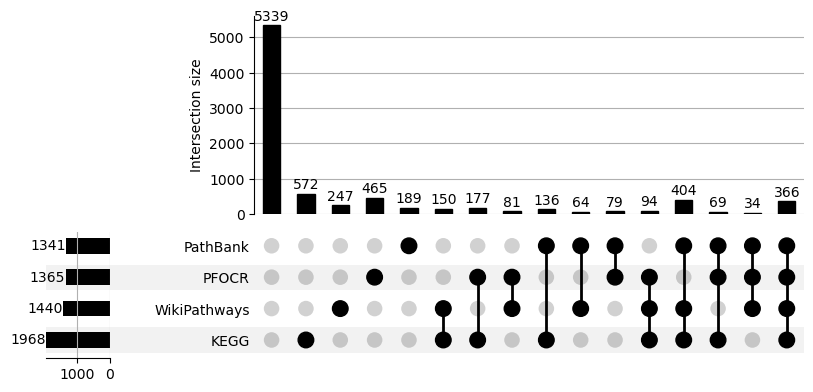

In [237]:
plot(from_indicators(indicators=pd.isna, data=overlap_df), show_counts=True)

c:\Users\kozo2\mambaforge\lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e'
 'black' 'black' '#0000002e' 'black' 'black' 'black' 'black' 'black'
 '#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' 'black' 'black' '#0000002e' 'black' '#0000002e' 'black'
 'black' '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e' 'black'
 'black' 'black' 'black' '#0000002e' '#0000002e' 'black' 'black'
 '#0000002e' '#0000002e' '#0000002e' 'black' 'black' 'black' '#0000002e'
 'black' 'black' '#0000002e' 'black' '#0000002e' 'black' '#0000002e'
 'black' 'black' 'black']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
c:\Use

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

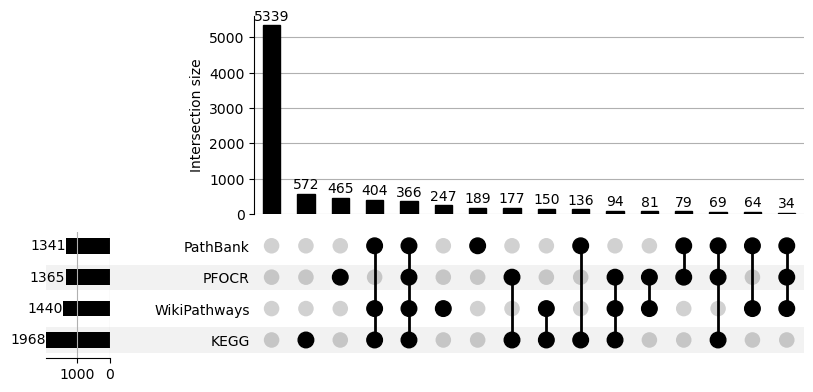

In [239]:
plot(from_indicators(indicators=pd.isna, data=overlap_df), show_counts=True, sort_by='cardinality')

c:\Users\kozo2\mambaforge\lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' 'black' 'black' 'black' '#0000002e' 'black' '#0000002e'
 'black' 'black' '#0000002e' 'black' 'black' '#0000002e' '#0000002e'
 'black' 'black' '#0000002e' 'black' 'black' '#0000002e' 'black' 'black'
 'black' '#0000002e' 'black' '#0000002e' '#0000002e' 'black' 'black'
 'black' '#0000002e' '#0000002e' 'black' '#0000002e' 'black' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' 'black'
 '#0000002e' '#0000002e' 'black' 'black' 'black' 'black' 'black' 'black'
 '#0000002e' 'black' '#0000002e' '#0000002e' 'black' '#0000002e' 'black'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
c:\Use

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

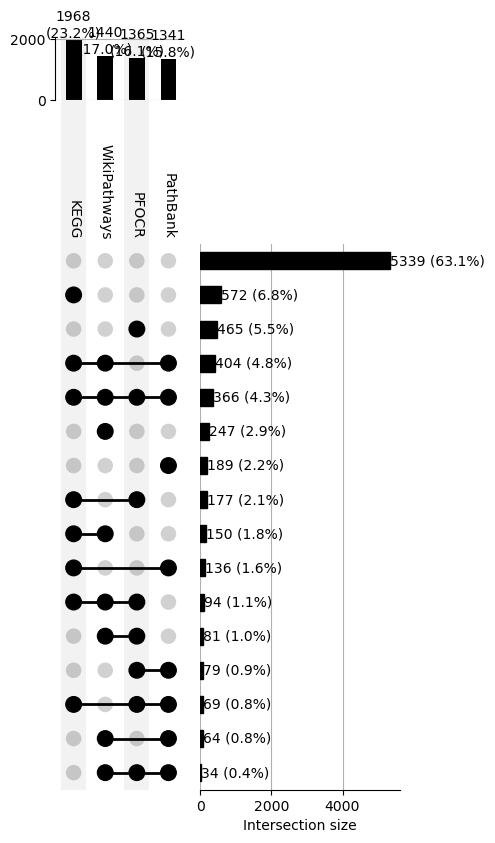

In [240]:
plot(from_indicators(indicators=pd.isna, data=overlap_df), show_counts=True, orientation='vertical', sort_by='cardinality', show_percentages=True)

c:\Users\kozo2\mambaforge\lib\site-packages\upsetplot\plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#00008b2e' 'darkblue' 'darkblue' 'darkblue' '#00008b2e' 'darkblue'
 '#00008b2e' 'darkblue' 'darkblue' '#00008b2e' 'darkblue' 'darkblue'
 '#00008b2e' '#00008b2e' 'darkblue' 'darkblue' '#00008b2e' 'darkblue'
 'darkblue' '#00008b2e' 'darkblue' 'darkblue' 'darkblue' '#00008b2e'
 'darkblue' '#00008b2e' '#00008b2e' 'darkblue' 'darkblue' 'darkblue'
 '#00008b2e' '#00008b2e' 'darkblue' '#00008b2e' 'darkblue' '#00008b2e'
 '#00008b2e' '#00008b2e' '#00008b2e' 'darkblue' '#00008b2e' 'darkblue'
 '#00008b2e' '#00008b2e' 'darkblue' 'darkblue' 'darkblue' 'darkblue'
 'darkblue' 'darkblue' '#00008b2e' 'darkblue' '#00008b2e' '#00008b2e'
 'darkblue' '#00008b2e' 'darkblue' '#00008b2e' '#00008b2e' '#00008b2e'
 '#00008b2e' '#00008b2e' '#00008b2e' '#00008b2e']' has dtype incompatible with float64, please explicitly cast to

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

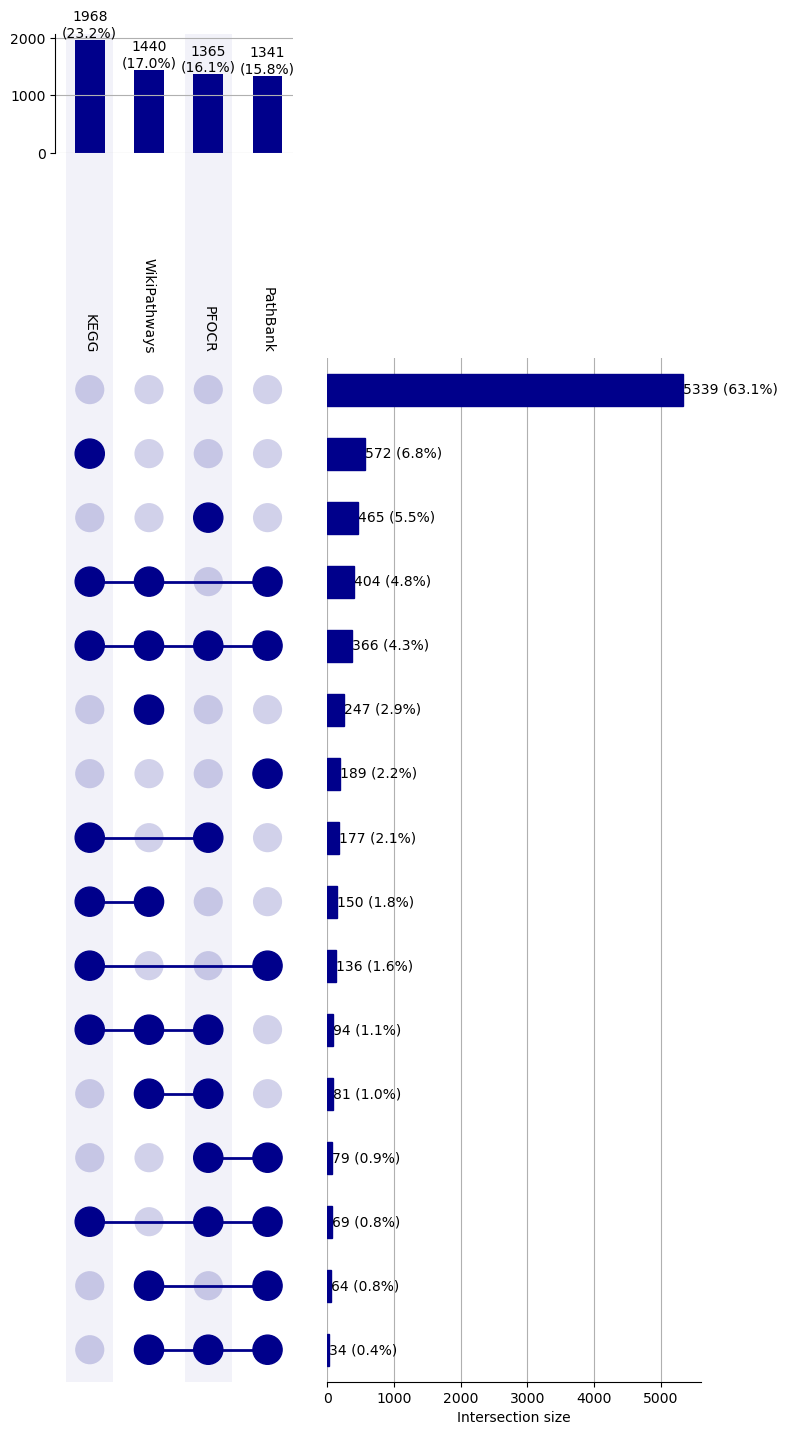

In [243]:
plot(from_indicators(indicators=pd.isna, data=overlap_df), show_counts=True, orientation='vertical', sort_by='cardinality', show_percentages=True, element_size=60, facecolor="darkblue")

# Create Pie chart from Upset plot

In [246]:
overlap_df

,MW,KEGG,PathBank,WikiPathways,PFOCR
0,SBALNGLYQFMKPR,False,False,False,False
1,DJWXVEDJWPDUBQ,False,False,False,False
2,SZDGAZFTAUFFQH,False,False,False,False
3,PXFBZOLANLWPMH,False,False,False,False
4,XJOOMMHNYOJWCZ,NaN,False,False,False
...,...,...,...,...,...
8461,HCXVJBMSMIARIN,NaN,NaN,NaN,NaN
8462,PTTJLTMUKRRHAT,False,False,False,False
8463,AVXURJPOCDRRFD,NaN,False,NaN,NaN
8464,NBIIXXVUZAFLBC,NaN,NaN,NaN,False


In [255]:
# select overlap_df rows that the "KEGG" and "PathBank" and "WikiPathways" and "PFOCR" column valuea are all False
only_in_mw = overlap_df[(overlap_df["KEGG"] == False) & (overlap_df["PathBank"] == False) & (overlap_df["WikiPathways"] == False) & (overlap_df["PFOCR"] == False)]

In [256]:
only_in_mw

,MW,KEGG,PathBank,WikiPathways,PFOCR
0,SBALNGLYQFMKPR,False,False,False,False
1,DJWXVEDJWPDUBQ,False,False,False,False
2,SZDGAZFTAUFFQH,False,False,False,False
3,PXFBZOLANLWPMH,False,False,False,False
7,IXPDLJKEPLTCOU,False,False,False,False
...,...,...,...,...,...
8456,CQSRUKJFZKVYCY,False,False,False,False
8459,MKGZDUKUQPPHFM,False,False,False,False
8460,IMWBKGMKWXIXEQ,False,False,False,False
8462,PTTJLTMUKRRHAT,False,False,False,False


In [304]:
only_in_kegg = overlap_df[(overlap_df["KEGG"].isna()) & (overlap_df["PathBank"] == False) & (overlap_df["WikiPathways"] == False) & (overlap_df["PFOCR"] == False)]

In [305]:
only_in_kegg

,MW,KEGG,PathBank,WikiPathways,PFOCR
4,XJOOMMHNYOJWCZ,NaN,False,False,False
6,HYBRYAPKQCZIAE,NaN,False,False,False
12,MTXSIJUGVMTTMU,NaN,False,False,False
24,NDNUANOUGZGEPO,NaN,False,False,False
33,AUOFTPXWUVYOOQ,NaN,False,False,False
...,...,...,...,...,...
8255,DYVGYXXLXQESJE,NaN,False,False,False
8445,JVKYZPBMZPJNAJ,NaN,False,False,False
8446,KWVISVAMQJWJSZ,NaN,False,False,False
8448,XYNPYHXGMWJBLV,NaN,False,False,False


In [310]:
only_in_pfocr = overlap_df[(overlap_df["KEGG"] == False) & (overlap_df["PathBank"] == False) & (overlap_df["WikiPathways"] == False) & (overlap_df["PFOCR"].isna())]

In [311]:
only_in_pfocr

,MW,KEGG,PathBank,WikiPathways,PFOCR
15,HJJPJSXJAXAIPN,False,False,False,NaN
42,IUKLSMSEHKDIIP,False,False,False,NaN
43,IQDIERHFZVCNRZ,False,False,False,NaN
52,RPQXVSUAYFXFJA,False,False,False,NaN
53,FCEVNJIUIMLVML,False,False,False,NaN
...,...,...,...,...,...
8364,TTXJJFWWNDJDNR,False,False,False,NaN
8382,RLHIRZFWJBOHHD,False,False,False,NaN
8420,UJVLDDZCTMKXJK,False,False,False,NaN
8432,XIWMRKFKSRYSIJ,False,False,False,NaN


In [308]:
overlap_df["KEGG"].isna()

0       False
1       False
2       False
3       False
4        True
        ...  
8461     True
8462    False
8463     True
8464     True
8465    False
Name: KEGG, Length: 8466, dtype: bool

In [303]:
overlap_df["PathBank"] == False

0        True
1        True
2        True
3        True
4        True
        ...  
8461    False
8462     True
8463     True
8464    False
8465     True
Name: PathBank, Length: 8466, dtype: bool

In [247]:
# read "data/mw/refmet_in_allmsstudies_hasinchikey.tsv" as a dataframe
refmet_df = pd.read_table("data/mw/refmet_in_allmsstudies_hasinchikey.tsv")

In [248]:
refmet_df

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,C18H22ClNO6,383.113567,SBALNGLYQFMKPR-NQTWQHAWSA-N,COC1=CC(=O)[C@@]2([C@@H]1O)[C@@H](Cl)C[C@]13NC...,442840.0
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,C22H20N2O7,424.127053,DJWXVEDJWPDUBQ-DEALGVFLSA-N,COC(=O)C1=CO[C@H](O)[C@H]2[C@@H]1Cc1nc(C(=O)O)...,441972.0
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,C21H21NO6,383.136889,SZDGAZFTAUFFQH-OALUTQOASA-N,COc1cc2c(cc1OC)[C@@H]([C@H]1OC(=O)c3c1ccc1c3OC...,442155.0
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,C20H24N2O2,324.183778,PXFBZOLANLWPMH-SMLHJDAJSA-N,C/C=C1/CN(C)[C@@H]2Cc3c([nH]c4ccccc34)C(=O)C[C...,5281345.0
4,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,C16H18N2,238.146999,XJOOMMHNYOJWCZ-UKRRQHHQSA-N,CC1=C[C@@H]2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1,73484.0
...,...,...,...,...,...,...,...,...,...
8835,Stigmasterol,Sterol Lipids,Sterols,Stigmasterols,C29H48O,412.370515,HCXVJBMSMIARIN-PHZDYDNGSA-N,CC(C)[C@@H](CC)/C=C/[C@H](C)[C@@H]1CC[C@@H]2[C...,5280794.0
8836,Taccalonolide A,Sterol Lipids,Sterols,Withanolides,C36H46O14,702.288760,PTTJLTMUKRRHAT-VJAKQJMOSA-N,CC(=O)O[C@@H]1[C@H]2[C@H]3[C@H]([C@H](OC(C)=O)...,441685.0
8837,Hydroxylamine,Unclassified,Unclassified,Unclassified,H3NO,33.021464,AVXURJPOCDRRFD-UHFFFAOYSA-N,NO,787.0
8838,Phosphoric acid,Unclassified,Unclassified,Unclassified,PH3O4,97.976898,NBIIXXVUZAFLBC-UHFFFAOYSA-N,O=P(O)(O)O,1004.0


In [251]:
# drop smile column from refmet_df
refmet_df = refmet_df.drop(columns=["formula", "exactmass", "smiles", "pubchem_cid"])

In [252]:
refmet_df

,refmet_name,super_class,main_class,sub_class,inchi_key
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,SBALNGLYQFMKPR-NQTWQHAWSA-N
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,DJWXVEDJWPDUBQ-DEALGVFLSA-N
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,SZDGAZFTAUFFQH-OALUTQOASA-N
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,PXFBZOLANLWPMH-SMLHJDAJSA-N
4,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,XJOOMMHNYOJWCZ-UKRRQHHQSA-N
...,...,...,...,...,...
8835,Stigmasterol,Sterol Lipids,Sterols,Stigmasterols,HCXVJBMSMIARIN-PHZDYDNGSA-N
8836,Taccalonolide A,Sterol Lipids,Sterols,Withanolides,PTTJLTMUKRRHAT-VJAKQJMOSA-N
8837,Hydroxylamine,Unclassified,Unclassified,Unclassified,AVXURJPOCDRRFD-UHFFFAOYSA-N
8838,Phosphoric acid,Unclassified,Unclassified,Unclassified,NBIIXXVUZAFLBC-UHFFFAOYSA-N


In [253]:
# get first 14 characters of inchi_key column
refmet_inchikey_prefix = [get_inchikey_prefix(x) for x in refmet_df["inchi_key"]]

In [254]:
refmet_inchikey_prefix

['SBALNGLYQFMKPR',
 'DJWXVEDJWPDUBQ',
 'SZDGAZFTAUFFQH',
 'PXFBZOLANLWPMH',
 'XJOOMMHNYOJWCZ',
 'CJDRUOGAGYHKKD',
 'HYBRYAPKQCZIAE',
 'IXPDLJKEPLTCOU',
 'AKNNEGZIBPJZJG',
 'NGGOLDIRUNJLSH',
 'DRVWTOSBCBKXOR',
 'IZNXKZBIIFOWPU',
 'MTXSIJUGVMTTMU',
 'SGNXVBOIDPPRJJ',
 'ABMMKLCVJJTPJD',
 'HJJPJSXJAXAIPN',
 'JHXYFYGGFKMUPN',
 'ZDXGFIXMPOUDFF',
 'VTTONGPRPXSUTJ',
 'XFWSJSOEWSRENH',
 'ZERVJPYNQLONEK',
 'QPRMGHKASRLPJP',
 'KLFYPJRLOIHTCM',
 'GPLGAQQQNWMVMM',
 'NDNUANOUGZGEPO',
 'CIPULDKLIIVIER',
 'ZEBIACKKLGVLFZ',
 'AJLCXXKDNUGKKH',
 'CVBMAZKKCSYWQR',
 'PBUNVLRHZGSROC',
 'JWTAWEGUCCQPAM',
 'NLPRAJRHRHZCQQ',
 'SEJUQQOPVAUETF',
 'AUOFTPXWUVYOOQ',
 'RIHQHYIWKHVLRH',
 'FGNUNVVTHHKDAM',
 'ADKXZIOQKHHDNQ',
 'YGSVZRIZCHZUHB',
 'TYHJMEIBGDDCPA',
 'NIPLIJLVGZCKMP',
 'HIOROZIUERMMRQ',
 'XVPBINOPNYFXID',
 'IUKLSMSEHKDIIP',
 'IQDIERHFZVCNRZ',
 'QCHFTSOMWOSFHM',
 'KYBOBXNXZQTAKA',
 'GPTFURBXHJWNHR',
 'HYTGGNIMZXFORS',
 'BFLXOMFFVWQPAZ',
 'SZLZWPPUNLXJEA',
 'QEVHRUUCFGRFIF',
 'HJCSQOSWSRPBOU',
 'RPQXVSUAYF

In [257]:
type(refmet_inchikey_prefix)

list

In [258]:
refmet_df['inchi_key_prefix'] = refmet_inchikey_prefix

In [259]:
refmet_df

,refmet_name,super_class,main_class,sub_class,inchi_key,inchi_key_prefix
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,SBALNGLYQFMKPR-NQTWQHAWSA-N,SBALNGLYQFMKPR
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,DJWXVEDJWPDUBQ-DEALGVFLSA-N,DJWXVEDJWPDUBQ
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,SZDGAZFTAUFFQH-OALUTQOASA-N,SZDGAZFTAUFFQH
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,PXFBZOLANLWPMH-SMLHJDAJSA-N,PXFBZOLANLWPMH
4,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,XJOOMMHNYOJWCZ-UKRRQHHQSA-N,XJOOMMHNYOJWCZ
...,...,...,...,...,...,...
8835,Stigmasterol,Sterol Lipids,Sterols,Stigmasterols,HCXVJBMSMIARIN-PHZDYDNGSA-N,HCXVJBMSMIARIN
8836,Taccalonolide A,Sterol Lipids,Sterols,Withanolides,PTTJLTMUKRRHAT-VJAKQJMOSA-N,PTTJLTMUKRRHAT
8837,Hydroxylamine,Unclassified,Unclassified,Unclassified,AVXURJPOCDRRFD-UHFFFAOYSA-N,AVXURJPOCDRRFD
8838,Phosphoric acid,Unclassified,Unclassified,Unclassified,NBIIXXVUZAFLBC-UHFFFAOYSA-N,NBIIXXVUZAFLBC


In [260]:
refmet_df.to_csv("data/mw/refmet_in_allmsstudies_hasinchikey_prefix.tsv", sep="\t", index=False)

In [263]:
only_in_mw_refmet_df = refmet_df[refmet_df['inchi_key_prefix'].isin(only_in_mw['MW'])]

In [264]:
only_in_mw_refmet_df

,refmet_name,super_class,main_class,sub_class,inchi_key,inchi_key_prefix
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,SBALNGLYQFMKPR-NQTWQHAWSA-N,SBALNGLYQFMKPR
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,DJWXVEDJWPDUBQ-DEALGVFLSA-N,DJWXVEDJWPDUBQ
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,SZDGAZFTAUFFQH-OALUTQOASA-N,SZDGAZFTAUFFQH
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,PXFBZOLANLWPMH-SMLHJDAJSA-N,PXFBZOLANLWPMH
7,alpha-Erythroidine,Alkaloids,Alkaloids,Other alkaloids,IXPDLJKEPLTCOU-FFSVYQOJSA-N,IXPDLJKEPLTCOU
...,...,...,...,...,...,...
8830,Isofucostanol,Sterol Lipids,Sterols,Stigmasterols,CQSRUKJFZKVYCY-WZJYZIMXSA-N,CQSRUKJFZKVYCY
8833,"Stigmasta-4,22-dien-3-one",Sterol Lipids,Sterols,Stigmasterols,MKGZDUKUQPPHFM-LPJPOILFSA-N,MKGZDUKUQPPHFM
8834,"Stigmasta-7,22E,25-trien-3beta-ol",Sterol Lipids,Sterols,Stigmasterols,IMWBKGMKWXIXEQ-FXIAWGAOSA-N,IMWBKGMKWXIXEQ
8836,Taccalonolide A,Sterol Lipids,Sterols,Withanolides,PTTJLTMUKRRHAT-VJAKQJMOSA-N,PTTJLTMUKRRHAT


In [286]:
value_counts = only_in_mw_refmet_df['main_class'].value_counts()
percentages = 100 * value_counts / value_counts.sum()
threshold_percentage = 3
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > threshold_percentage else ''
labels = [f"{idx} - {val:.1f}%" if val > threshold_percentage else '' for idx, val in zip(value_counts.index, percentages)]

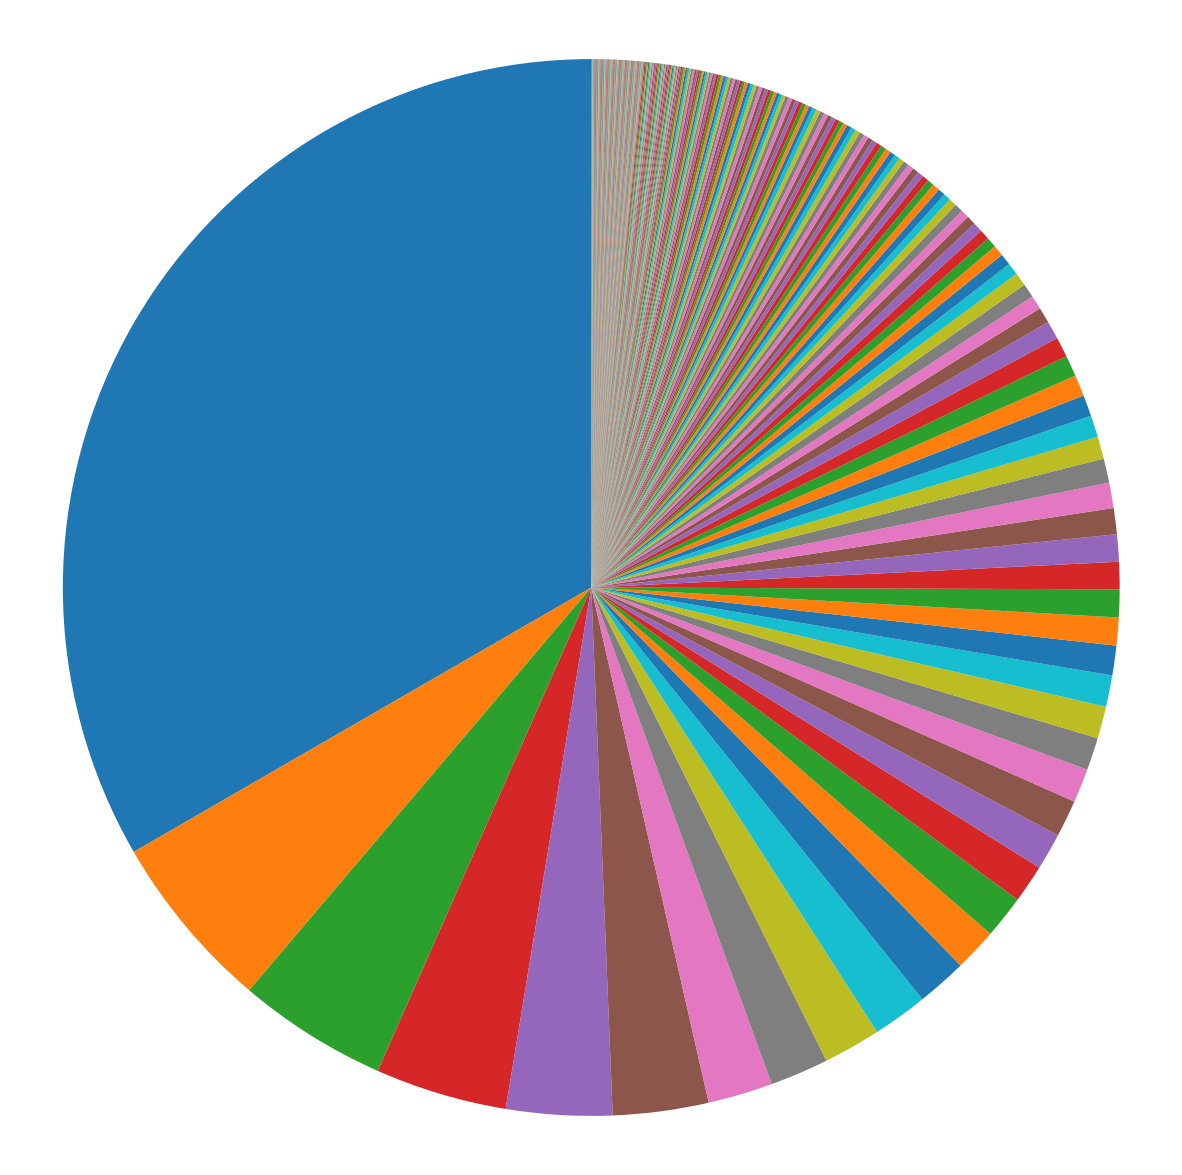

In [290]:
#plt.figure(figsize=(15, 15))
fig, ax = plt.subplots(figsize=(15, 15))
#plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)  # autopct でパーセンテージ表示
#plt.pie(value_counts, labels=labels, autopct=custom_autopct, startangle=90, textprops={'fontsize': 30})
#ax.pie(value_counts, labels=labels, autopct=custom_autopct, startangle=90, textprops={'fontsize': 30})
ax.pie(value_counts, labels=None, startangle=90)
#plt.title('Value Counts Pie Chart')

fig.patch.set_facecolor('none')  # 図全体の背景を透明に設定
fig.patch.set_alpha(0)  # 透明度を設定（0は完全に透明を意味する）
ax.patch.set_facecolor('none')  # 軸の背景を透明に設定

plt.axis('equal')  # アスペクト比を等しくして、円を丸く保つ
plt.show()

<Axes: ylabel='count'>

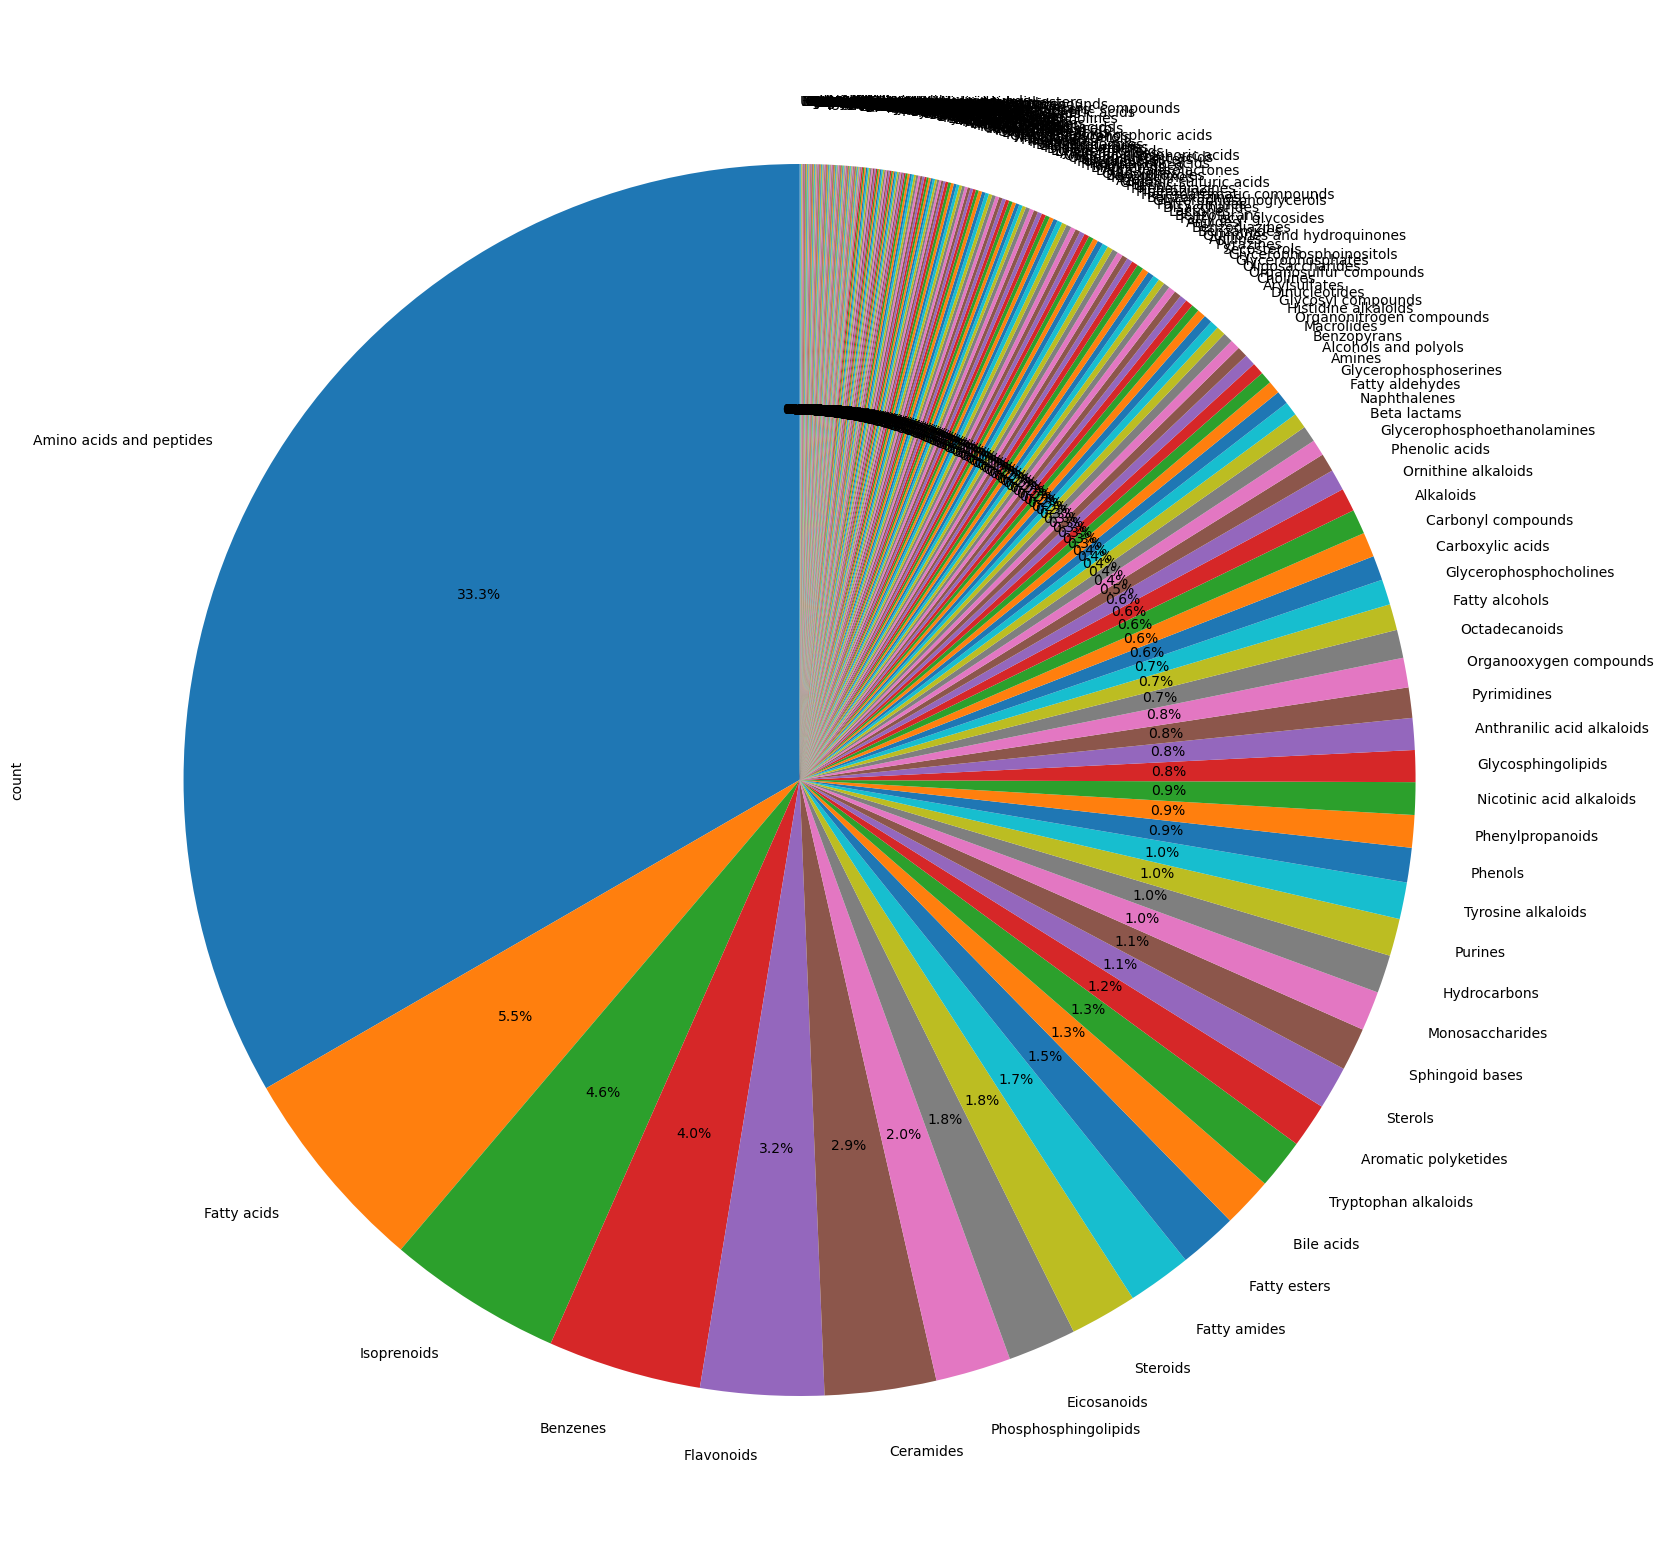

In [272]:
# create a pie chart of only_in_mw_refmet_df "main_class" column
only_in_mw_refmet_df['main_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(20, 20))
#only_in_mw_refmet_df['super_class'].value_counts().plot(kind='pie', autopct='%1.1f%%')